In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyvtools.text as vtext

import pyvdirs.dirs as dirs
import sys
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))
from socket import gethostname

from ToyExample.toy_example import extract_results_from_log, plot_loss

%load_ext autoreload
%autoreload 2

## Parameters

In [2]:
log_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "14_OuterDist", "log_InvertedGuideACID.txt")
log_path_2 = os.path.join(dirs.MODELS_HOME, "ToyExample", "14_OuterDist", "log_NoACIDGuided.txt")
# log_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "log_test.txt")

## Extract loss

In [6]:
results = extract_results_from_log(log_path)

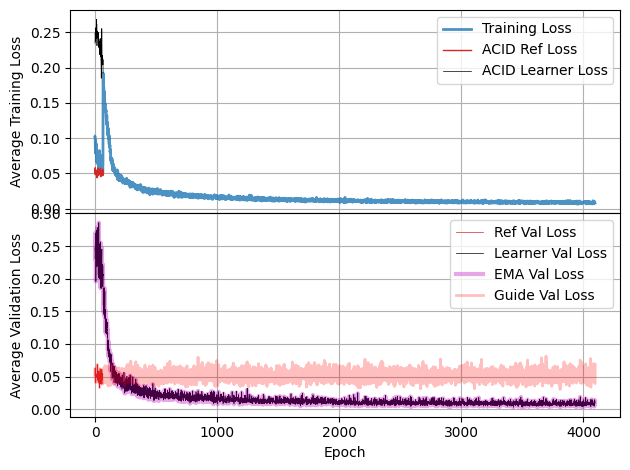

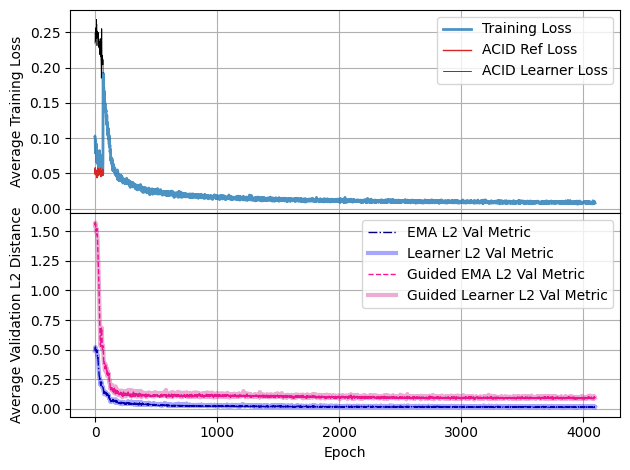

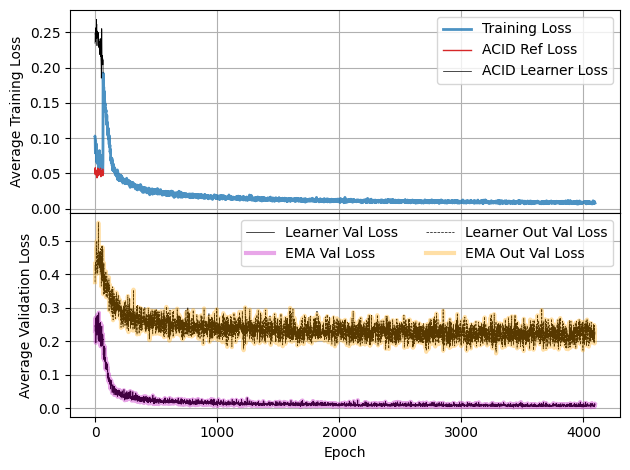

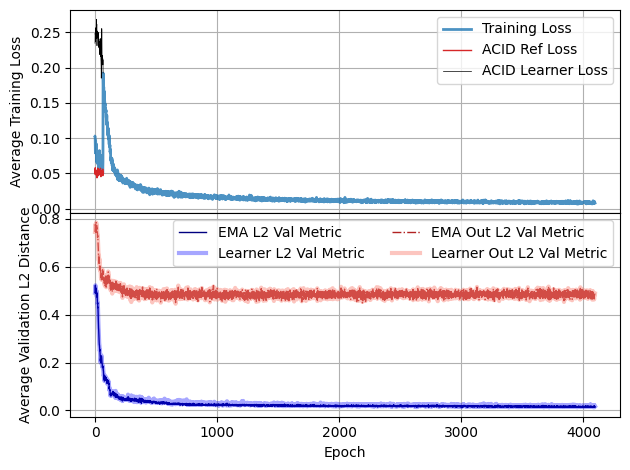

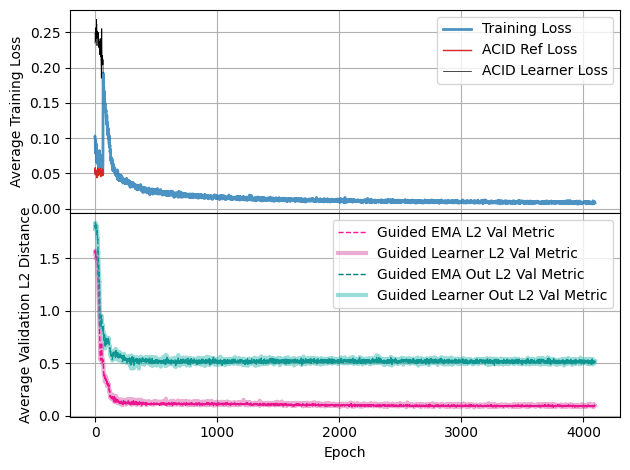

In [27]:
fig_path = log_path.replace(".txt",".png").replace("log", "plot")

figs = plot_loss(results, fig_path=fig_path)

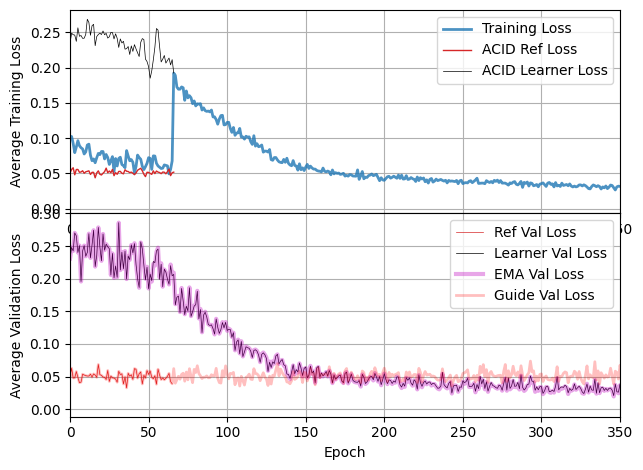

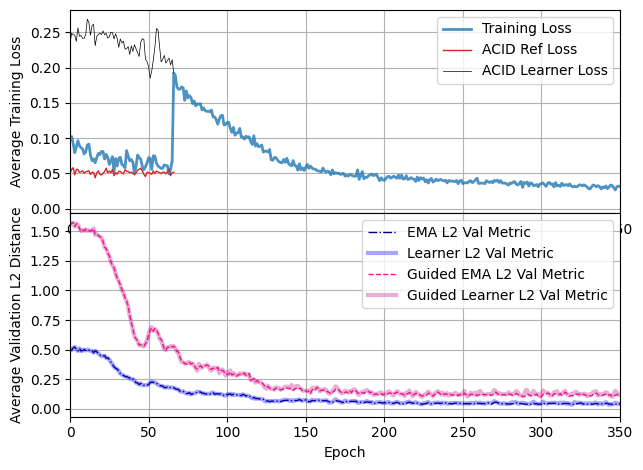

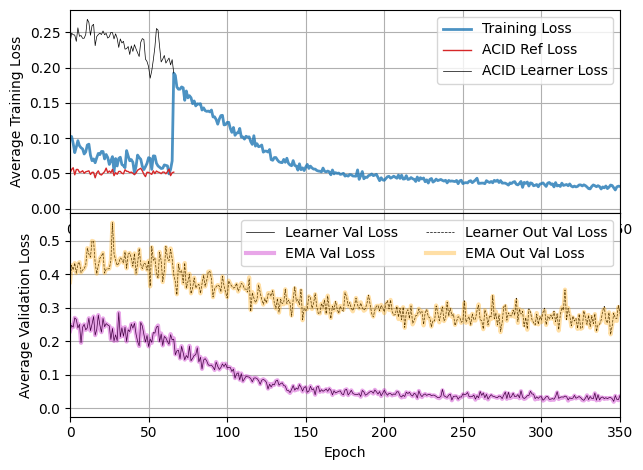

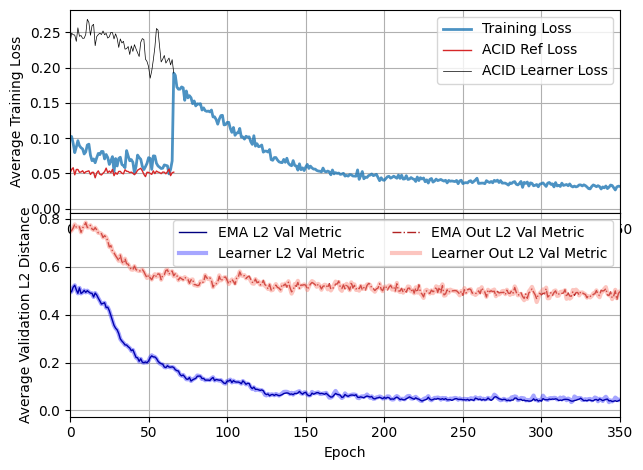

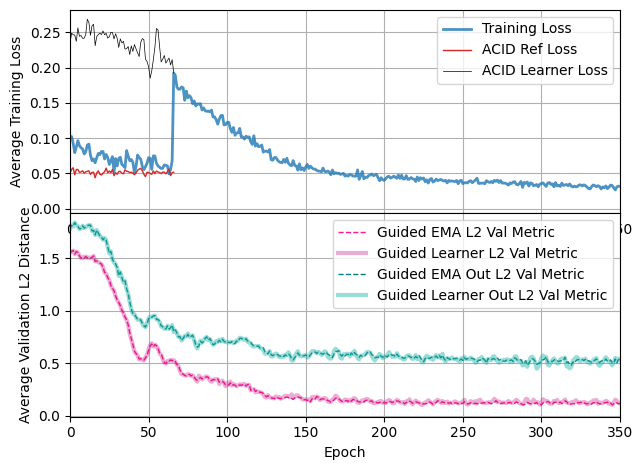

In [26]:
fig_path = log_path.replace(".txt",".png").replace("log", "plot")

figs = plot_loss(results, fig_path=fig_path)

fig_path = fig_path.replace("plot", "zoom")

fig_path_base, fig_extension = os.path.splitext(fig_path)

for i, fig in enumerate(figs):
    axes = fig.axes
    for ax in axes:
        ax.set_xlim([0,350])
    fig.savefig(fig_path_base+"_"+str(i+1)+fig_extension)

In [29]:
results_2 = extract_results_from_log(log_path_2)

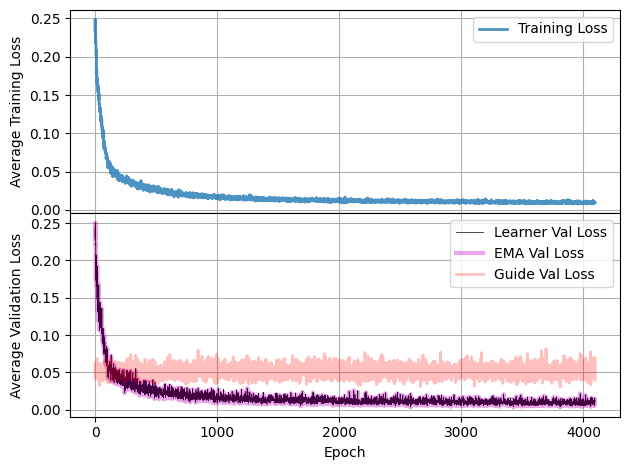

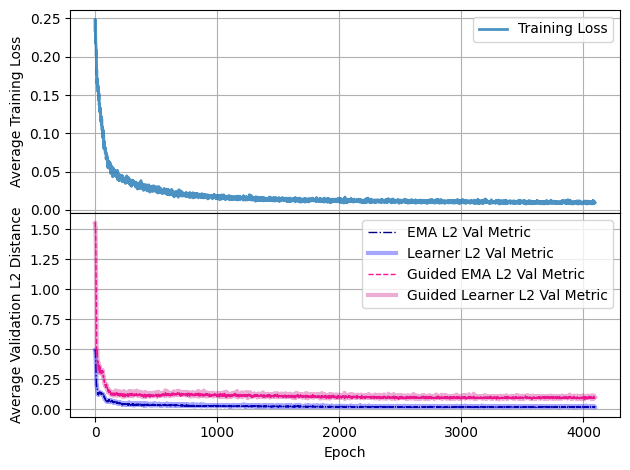

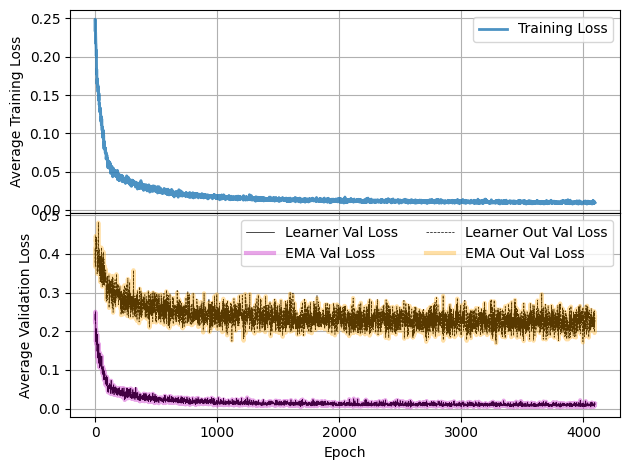

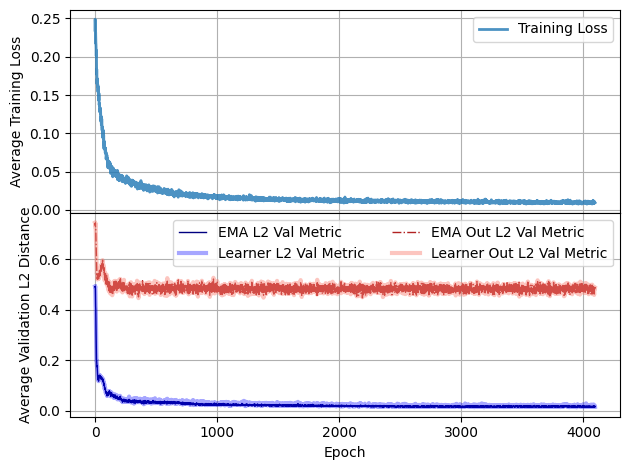

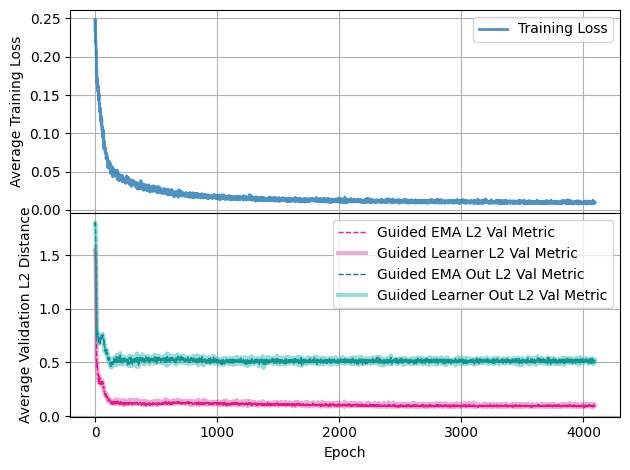

In [30]:
fig_path = log_path_2.replace(".txt",".png").replace("log", "plot")

figs = plot_loss(results_2, fig_path=fig_path)

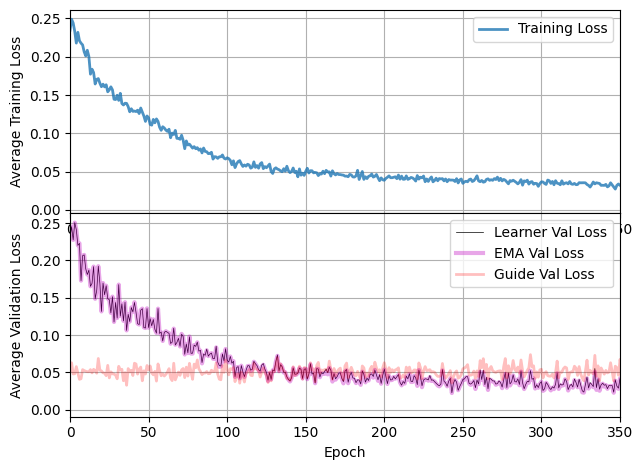

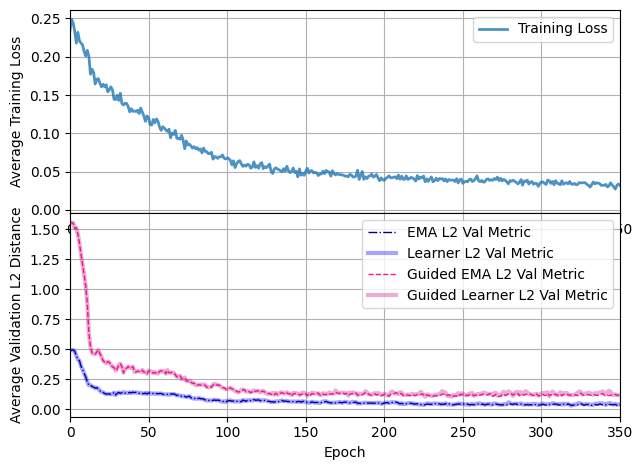

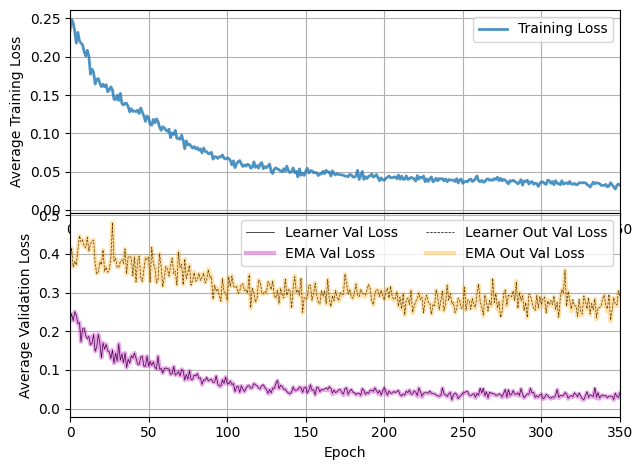

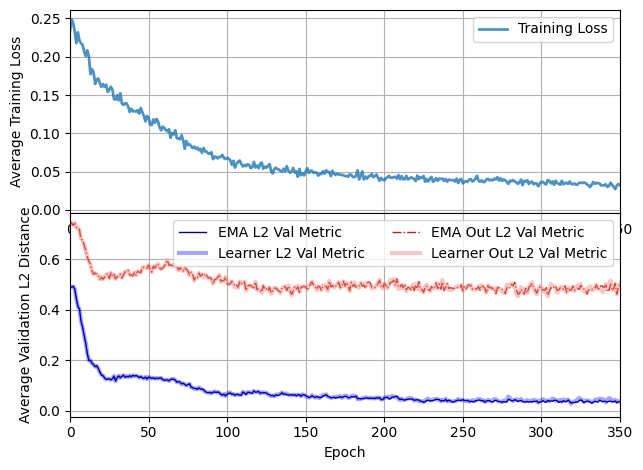

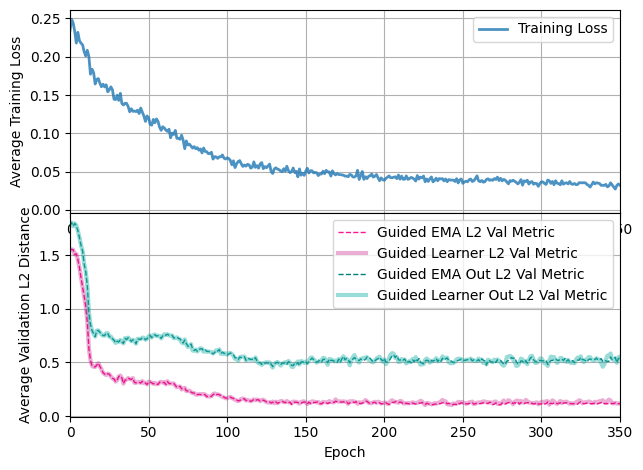

In [31]:
fig_path = log_path_2.replace(".txt",".png").replace("log", "plot")

figs = plot_loss(results_2, fig_path=fig_path)

fig_path = fig_path.replace("plot", "zoom")

fig_path_base, fig_extension = os.path.splitext(fig_path)

for i, fig in enumerate(figs):
    axes = fig.axes
    for ax in axes:
        ax.set_xlim([0,350])
    fig.savefig(fig_path_base+"_"+str(i+1)+fig_extension)

## Compare Two

### Automatically

In [ ]:
def compare_loss(log_path, plotting=True):
    
    if "No_ACID" in log_path:
        acid_first = False
        log_path_2 = log_path.replace("No_ACID", "ACID")
        labels = ["No ACID", "ACID"]
    else:
        acid_first = True
        log_path_2 = log_path.replace("ACID", "No_ACID")
        labels = ["ACID", "No ACID"]
    
    results = extract_results_from_log(log_path, plotting=False)
    results_2 = extract_results_from_log(log_path_2, plotting=False)

    train_loss_colors = ["C0", "mediumblue"]
    ref_loss_colors = ["C3", "lightcoral"]
    val_loss_colors = ["k", "grey"]
    val_linestyle = [":", "-"]
    linewidth = [2, 0.5]
    zorder = [100, 0]
    if not acid_first: 
        train_loss_colors = train_loss_colors[::-1]
        val_loss_colors = val_loss_colors[::-1]
        val_linestyle = val_linestyle[::-1]
        linewidth = linewidth[::-1]
        zorder = zorder[::-1]

    if plotting:
        plt.figure()
        plt.plot(results["ref_loss"], color=ref_loss_colors[0], label=labels[0]+" Ref Training", alpha=0.8, zorder=zorder[0], linewidth=linewidth[0])
        plt.plot(results_2["ref_loss"], color=ref_loss_colors[1], label=labels[1]+" Ref Training", alpha=0.8, zorder=zorder[1], linewidth=linewidth[1])
        plt.plot(results["mini_learner_loss"], color=train_loss_colors[0], label=labels[0]+" Training", alpha=0.8, linewidth=linewidth[0])
        plt.plot(results_2["mini_learner_loss"], color=train_loss_colors[1], label=labels[1]+" Training", alpha=0.8, linewidth=linewidth[1])
        if len(results["ref_val_loss"])>0: 
            plt.plot(results["learner_val_loss"], color=val_loss_colors[0], linestyle=val_linestyle[0], label=labels[0]+" Validation", alpha=1, linewidth=1, zorder=zorder[0])
            plt.plot(results["learner_val_loss"], color=val_loss_colors[1], linestyle=val_linestyle[1], label=labels[1]+" Validation", alpha=1, linewidth=1, zorder=zorder[1])
        plt.xlabel("Epoch")
        plt.ylabel("Average Loss")
        plt.grid()
        plt.legend()
        plt.tight_layout()

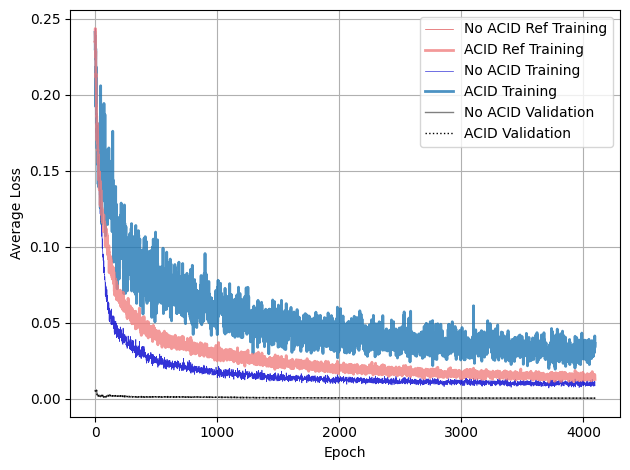

In [ ]:
compare_loss(log_path)

### Manually

In [8]:
results = extract_results_from_log(log_path)
results_2 = extract_results_from_log(log_path_2)

In [9]:
super_learner_loss = results["super_learner_loss"]
super_ref_loss = results["super_ref_loss"]
learner_loss = results["learner_loss"]
learner_val_loss = results["learner_val_loss"]
ema_val_loss = results["ema_val_loss"]
guide_val_loss = results["guide_val_loss"]
ref_val_loss = results["ref_val_loss"]
ema_L2_val_metric = results["ema_L2_val_metric"]
ema_guided_L2_val_metric = results["ema_guided_L2_val_metric"]
L2_val_metric = results["L2_val_metric"]
guided_L2_val_metric = results["guided_L2_val_metric"]

super_learner_loss_2 = results_2["super_learner_loss"]
super_ref_loss_2 = results_2["super_ref_loss"]
learner_loss_2 = results_2["learner_loss"]
learner_val_loss_2 = results_2["learner_val_loss"]
ema_val_loss_2 = results_2["ema_val_loss"]
guide_val_loss_2 = results_2["guide_val_loss"]
ref_val_loss_2 = results_2["ref_val_loss"]
ema_L2_val_metric_2 = results_2["ema_L2_val_metric"]
ema_guided_L2_val_metric_2 = results_2["ema_guided_L2_val_metric"]
L2_val_metric_2 = results_2["L2_val_metric"]
guided_L2_val_metric_2 = results_2["guided_L2_val_metric"]

In [10]:
fig_path = log_path.replace(".txt",".png").replace("log","compared")
zoom_fig_path = fig_path.replace("compared","zoom_compared")

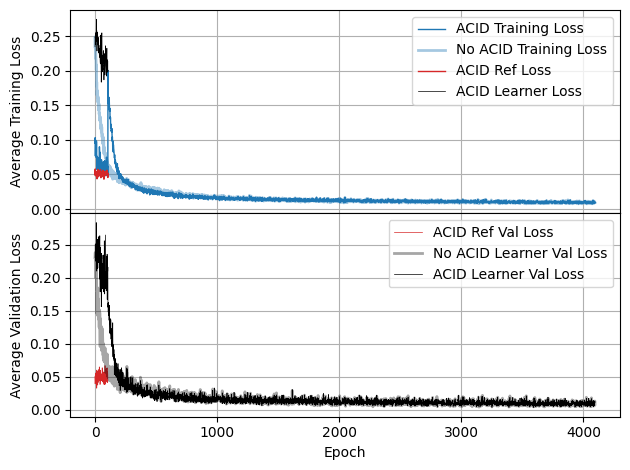

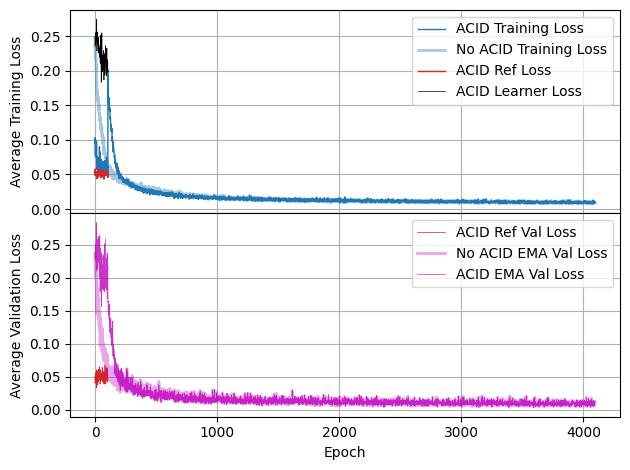

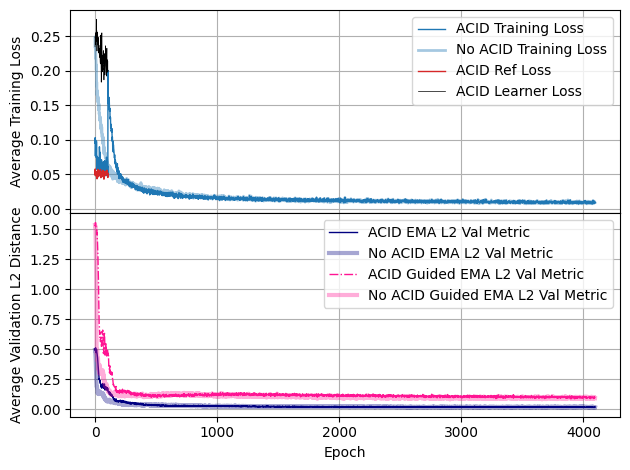

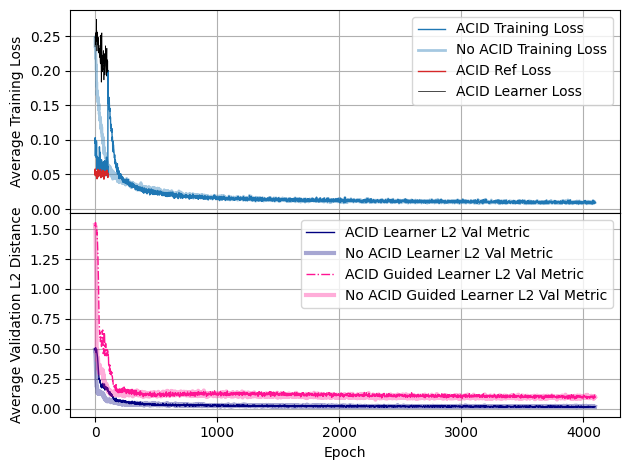

In [12]:
zoom_in = False
max_iter = 350

# Basic plot
def plot_training_loss():
    fig, axes = plt.subplots(nrows=2, gridspec_kw=dict(hspace=0))
    axes[0].plot(results["learner_loss"], "C0", label="ACID Training Loss", alpha=1, linewidth=1)
    axes[0].plot(results_2["learner_loss"], "C0", label="No ACID Training Loss", alpha=0.4, linewidth=2)
    if len(results["super_ref_loss"])>0: 
        axes[0].plot(results["super_ref_loss"], "C3", label="ACID Ref Loss", alpha=1, linewidth=1)
        axes[0].plot(results["super_learner_loss"], "k", label="ACID Learner Loss", alpha=1, linewidth=0.5)
    axes[1].set_xlabel("Epoch")
    axes[0].set_ylabel("Average Training Loss")
    axes[0].legend()
    for ax in axes: ax.grid()
    return fig, axes

# First, plot validation loss values
fig_0, axes_0 = plot_training_loss()
if len(learner_val_loss)>0:
    if len(ref_val_loss)>0:
        axes_0[1].plot(ref_val_loss, "C3", label="ACID Ref Val Loss", alpha=1, linewidth=0.5)
    axes_0[1].plot(learner_val_loss_2, "k", label="No ACID Learner Val Loss", alpha=0.35, linewidth=2)
    axes_0[1].plot(learner_val_loss, "k", label="ACID Learner Val Loss", alpha=1.0, linewidth=0.5)
axes_0[1].set_ylabel("Average Validation Loss")
axes_0[1].legend()
plt.tight_layout()
if zoom_in:
    for ax in axes_0: ax.set_xlim([0,max_iter])

# Also plot EMA validation loss values
fig_1, axes_1 = plot_training_loss()
if len(learner_val_loss)>0:
    if len(ref_val_loss)>0:
        axes_1[1].plot(ref_val_loss, "C3", label="ACID Ref Val Loss", alpha=1, linewidth=0.5)
    axes_1[1].plot(ema_val_loss_2, color="m", label="No ACID EMA Val Loss", alpha=0.35, linewidth=2)
    axes_1[1].plot(ema_val_loss, color="m", label="ACID EMA Val Loss", alpha=0.8, linewidth=0.5)
axes_1[1].set_ylabel("Average Validation Loss")
axes_1[1].legend()
plt.tight_layout()
if zoom_in:
    for ax in axes_1: ax.set_xlim([0,max_iter])
    
# Then, plot EMA validation loss values
fig_2, axes_2 = plot_training_loss()
if len(learner_val_loss)>0:
    axes_2[1].plot(results["ema_L2_val_metric"], "-", color="navy", 
                  label="ACID EMA L2 Val Metric", alpha=1, linewidth=1)
    axes_2[1].plot(results_2["ema_L2_val_metric"], "-", color="navy", 
                    label="No ACID EMA L2 Val Metric", alpha=0.35, linewidth=3)
    if len(results["ema_guided_L2_val_metric"])>0:
        axes_2[1].plot(results["ema_guided_L2_val_metric"], "-.", color="deeppink", 
                     label="ACID Guided EMA L2 Val Metric", alpha=1, linewidth=1)
        axes_2[1].plot(results_2["ema_guided_L2_val_metric"], "-", color="deeppink", 
                     label="No ACID Guided EMA L2 Val Metric", alpha=0.35, linewidth=3)
        axes_2[1].set_ylabel("Average Validation L2 Distance")
axes_2[1].legend()
plt.tight_layout()
if zoom_in:
    for ax in axes_2: ax.set_xlim([0,max_iter])

# Also plot EMA validation loss values
fig_3, axes_3 = plot_training_loss()
if len(learner_val_loss)>0:
    axes_3[1].plot(results["L2_val_metric"], "-", color="navy", 
                  label="ACID Learner L2 Val Metric", alpha=1, linewidth=1)
    axes_3[1].plot(results_2["L2_val_metric"], "-", color="navy", 
                    label="No ACID Learner L2 Val Metric", alpha=0.35, linewidth=3)
    if len(results["guided_L2_val_metric"])>0:
        axes_3[1].plot(results["guided_L2_val_metric"], "-.", color="deeppink", 
                     label="ACID Guided Learner L2 Val Metric", alpha=1, linewidth=1)
        axes_3[1].plot(results_2["guided_L2_val_metric"], "-", color="deeppink", 
                     label="No ACID Guided Learner L2 Val Metric", alpha=0.35, linewidth=3)
        axes_3[1].set_ylabel("Average Validation L2 Distance")
axes_3[1].legend()
plt.tight_layout()
if zoom_in:
    for ax in axes_3: ax.set_xlim([0,max_iter])

In [95]:
fig_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "08_GuideAsACIDRef", 
                        "compared_inverted_guide_acid_and_deactivate.png")
plt.savefig(fig_path)

<Figure size 640x480 with 0 Axes>

## Compare many

### Parameters

In [2]:
# series = ["18_Statistics", "19_ACIDParams", "21_Repetitions", "23_NormalizedLogits"]
series = ["23_NormalizedLogits"]

### Auxiliary definitions

In [238]:
get_path = lambda series : os.path.join(dirs.MODELS_HOME, "ToyExample", series)

host_id = gethostname()
other_hosts = vtext.filter_by_string_must(list(dirs.check_directories_file().keys()), [host_id,"else"], must=False)

series_folders = {}
for s in series:
    series_path = get_path(s)
    contents = os.listdir(series_path)
    folders = [c for c in contents if os.path.isdir(os.path.join(series_path, c))]
    folders = vtext.filter_by_string_must(folders, ["Failed", "Old"], must=False)
    series_folders[s] = folders

In [239]:
for s in series:
    if "NormalizedLogits" in s:
        sort_order = ["NoACID", "ACID", "EarlyACID", "LateACID", "InterpolACID", "EarlyInterpol", "LateInterpol"]
        sorted_folders = []
        for st in sort_order:
            for f in series_folders[s]:
                if f.startswith(st):
                    sorted_folders.append(f)
        series_folders[s] = sorted_folders

In [240]:
from re import finditer

def camel_case_split(identifier):
    """https://stackoverflow.com/questions/29916065/how-to-do-camelcase-split-in-python"""
    matches = finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', identifier)
    return [m.group(0) for m in matches]

label_series = {}
for s in series:
    label_series[s] = {}
    for f in series_folders[s]:
        label = " ".join(camel_case_split(f))
        label = label.replace("No ACID", "Autoguidance")
        if "Non Inverted" in label:
            label = label.replace("ACID Non Inverted", "ACID")
        else:
            label = label.replace("ACID", "iACID")
        label = label.replace("Interpol ", "p")
        label = label.replace("ACID", "AJEST")
        label_series[s][f] = label
label_series

{'23_NormalizedLogits': {'NoACID': 'Autoguidance',
  'ACID': 'iAJEST',
  'ACIDNonInverted': 'AJEST',
  'EarlyACID': 'Early iAJEST',
  'EarlyACIDNonInverted': 'Early AJEST',
  'LateACID': 'Late iAJEST',
  'LateACIDNonInverted': 'Late AJEST',
  'InterpolACID': 'piAJEST',
  'InterpolACIDNonInverted': 'pAJEST',
  'EarlyInterpolACID': 'Early piAJEST',
  'EarlyInterpolACIDNonInverted': 'Early pAJEST',
  'LateInterpolACID': 'Late piAJEST',
  'LateInterpolACIDNonInverted': 'Late pAJEST'}}

### Load data

In [241]:
loss_results = {}
val_results = {}
other_results = {}

for s in series:

    series_path = get_path(s)
    log_files = ["log_"+f+".txt" for f in series_folders[s]]
    assert all([os.path.isfile(os.path.join(series_path, f)) for f in log_files]), "Some logs have not been found"

    loss_results[s] = {}
    val_results[s] = {}
    other_results[s] = {}
    for f, log_file in zip(series_folders[s], log_files):

        log_filepath = os.path.join(series_path, log_file)

        these_results = extract_results_from_log(log_filepath)

        loss_results[s][f] = {}
        val_results[s][f] = {}
        other_results[s][f] = {}
        for key, value in these_results.items():
            if "val" in key:
                val_results[s][f][key] = value
            elif "loss" in key and "test" not in key:
                loss_results[s][f][key] = value
            else:
                other_results[s][f][key] = value

In [242]:
loss_results

{'23_NormalizedLogits': {'NoACID': {'super_learner_loss': [],
   'super_ref_loss': [],
   'learner_loss': [0.2412182092666626,
    0.23876473307609558,
    0.2338685393333435,
    0.23583634197711945,
    0.23043879866600037,
    0.21849803626537323,
    0.21701392531394958,
    0.20787465572357178,
    0.19891142845153809,
    0.19695819914340973,
    0.19001838564872742,
    0.18559125065803528,
    0.18566399812698364,
    0.19292911887168884,
    0.175217866897583,
    0.18421882390975952,
    0.17558573186397552,
    0.17883530259132385,
    0.1732369065284729,
    0.16965016722679138,
    0.1729646474123001,
    0.17534099519252777,
    0.17742696404457092,
    0.1679844856262207,
    0.16305209696292877,
    0.1718684285879135,
    0.16189613938331604,
    0.16942647099494934,
    0.16018186509609222,
    0.15421637892723083,
    0.16950954496860504,
    0.16332054138183594,
    0.16442149877548218,
    0.15779200196266174,
    0.16850562393665314,
    0.17072077095508575,
    0

### Get keys and fill gaps

#### Training Loss

In [243]:
loss_keys = set()
for s in series:
    for f in loss_results[s].keys():
        loss_keys.update( list(loss_results[s][f].keys()) )

In [244]:
for key in loss_keys:
    for s in series:
        for f, vals in loss_results[s].items():
            if key not in vals.keys():
                loss_results[s][f][key] = None

In [245]:
loss_keys

{'learner_loss', 'super_learner_loss', 'super_ref_loss'}

In [246]:
loss_names = {
    "learner_loss":"Learner's Average Loss",
    "super_learner_loss":"Learner's Super-Batch Average Loss",
    "super_ref_loss":"Reference's Super-Batch Average Loss"
}
assert all([key in loss_names.keys() for key in loss_keys]), "Missing key"

In [247]:
loss_keys = list(loss_names.keys())
sorted_results = {key: {s: {f: loss_results[s][f][key] for f in series_folders[s]} for s in series} for key in loss_keys}

#### Validation metrics

In [248]:
val_keys = set()
for s in series:
    for f in val_results[s].keys():
        val_keys.update( list(val_results[s][f].keys()) )

In [249]:
for key in val_keys:
    for s in series:
        for f, vals in val_results[s].items():
            if key not in vals.keys():
                val_results[s][f][key] = None

In [250]:
val_keys

{'L2_val_metric',
 'ema_L2_val_metric',
 'ema_guided_L2_val_metric',
 'ema_guided_out_L2_val_metric',
 'ema_out_L2_val_metric',
 'ema_out_val_loss',
 'ema_val_loss',
 'guide_out_val_loss',
 'guide_val_loss',
 'guided_L2_val_metric',
 'guided_out_L2_val_metric',
 'learner_out_val_loss',
 'learner_val_loss',
 'out_L2_val_metric',
 'ref_out_val_loss',
 'ref_val_loss'}

In [251]:
val_names = {
    "ema_val_loss":"EMA's Validation Average Loss",
    "ema_out_val_loss":"EMA's Validation Outer Average Loss",
    "learner_val_loss":"Learner's Validation Average Loss",
    "learner_out_val_loss":"Learner's Validation Outer Average Loss",
    "ref_val_loss":"Reference's Validation Average Loss",
    "ref_out_val_loss":"Reference's Validation Outer Average Loss",
    "guide_val_loss":"Guide's Validation Average Loss",
    "guide_out_val_loss":"Guide's Validation Outer Average Loss",
    "ema_L2_val_metric":"EMA's Validation Average L2 Distance",
    "ema_out_L2_val_metric":"EMA's Validation Outer Average L2 Distance",
    "L2_val_metric":"Learner's Validation Average L2 Distance",
    "out_L2_val_metric":"Learner's Validation Outer Average L2 Distance",
    "ema_guided_L2_val_metric":"Guided EMA's Validation Average L2 Distance",
    "ema_guided_out_L2_val_metric":"Guided EMA's Validation Outer Average L2 Distance",
    "guided_L2_val_metric":"Guided Learner's Validation Average L2 Distance",
    "guided_out_L2_val_metric":"Guided Learner's Validation Outer Average L2 Distance",
    # "ema_mandala_score":"EMA's Validation Mandala Score",
    # "learner_mandala_score":"Learner's Validation Mandala Score",
    # "ema_guided_mandala_score":"Guided EMA's Validation Mandala Score",
    # "learner_guided_mandala_score":"Guided Learner's Validation Mandala Score",
    # "ema_classification_score":"EMA's Validation Classification Score",
    # "learner_classification_score":"Learner's Validation Classification Score",
    # "ema_guided_classification_score":"Guided EMA's Validation Classification Score",
    # "learner_guided_classification_score":"Guided Learner's Validation Classification Score",
}
assert all([key in val_names.keys() for key in val_keys]), "Missing key"

In [252]:
val_keys = list(val_names.keys())
sorted_results = {key: {s: {f: val_results[s][f][key] for f in series_folders[s]} for s in series} for key in val_keys}

#### Time and other parameters

In [253]:
log_filepaths = {}
for s in series:
    series_path = get_path(s)
    log_files = ["log_"+f+".txt" for f in series_folders[s]]
    assert all([os.path.isfile(os.path.join(series_path, f)) for f in log_files]), "Some logs have not been found"
    
    log_filepaths[s] = {}
    for f, log_file in zip(series_folders[s], log_files):
        log_filepaths[s][f] = os.path.join(series_path, log_file)
        # for h in other_hosts:
                # guide_filepath = guide_filepath.replace(dirs.check_directories_file()[h]["models_home"], dirs.MODELS_HOME)

In [254]:
total_iters = 4096

acid_trigger = {}
for s in series:
    acid_trigger[s] = {}
    for f in series_folders[s]:
        found = False
        if "NoACID" in f:
            acid_trigger[s][f] = total_iters
            found = True
        else:
            with open(log_filepaths[s][f], "r") as file:
                for line in file:
                    if "Iteration" in line:
                        i = vtext.find_numbers( line.split("Iteration = ")[1] )[0]
                    elif "Network has beaten the reference" in line:
                        found = True
                        acid_trigger[s][f] = i
        if not found:
            if "Late" in f or "NoACID" in f:
                acid_trigger[s][f] = total_iters
            else:
                acid_trigger[s][f] = 0
acid_trigger

{'23_NormalizedLogits': {'NoACID': 4096,
  'ACID': 0,
  'ACIDNonInverted': 0,
  'EarlyACID': 194,
  'EarlyACIDNonInverted': 193,
  'LateACID': 139,
  'LateACIDNonInverted': 139,
  'InterpolACID': 203,
  'InterpolACIDNonInverted': 198,
  'EarlyInterpolACID': 203,
  'EarlyInterpolACIDNonInverted': 198,
  'LateInterpolACID': 139,
  'LateInterpolACIDNonInverted': 139}}

In [6]:
(194*0.8*4096+(4096-194)*4096) / (4096*4096)

0.99052734375

In [ ]:
4<<8

1024

In [4]:
51*16

816

In [5]:
1096*(1-0.8)

219.19999999999996

In [255]:
for s in series:
    for f in series_folders[s]:
        print(f, len(time_results[s][f]))

NoACID 4096
ACID 4096
ACIDNonInverted 4096
EarlyACID 4096
EarlyACIDNonInverted 4096
LateACID 4096
LateACIDNonInverted 4096
InterpolACID 4096
InterpolACIDNonInverted 4096
EarlyInterpolACID 4096
EarlyInterpolACIDNonInverted 4096
LateInterpolACID 4096
LateInterpolACIDNonInverted 4096


In [256]:
total_iters = 4096
acid_speed = 1.9 # 1.5 # It/s
no_acid_speed = 3.0 # It/s

print("Benchmarked on a single A5000 GPU")

time_results = {} # sec
total_time_results = {} # min
for s in series:
    time_results[s] = {}
    total_time_results[s] = {}
    for f in series_folders[s]:
        speed = np.ones(total_iters) * no_acid_speed
        if "NoACID" not in f:
            if "Late" not in f:
                speed[:acid_trigger[s][f]] = acid_speed
            if "Early" not in f:
                speed[acid_trigger[s][f]:] = acid_speed
        time_results[s][f] = np.array([ np.sum(1 / speed[:i]) for i in range(total_iters) ])
        total_time_results[s][f] = max(time_results[s][f]) / 60
total_time_results

Benchmarked on a single A5000 GPU


{'23_NormalizedLogits': {'NoACID': 22.749999999999993,
  'ACID': 35.921052631578945,
  'ACIDNonInverted': 35.921052631578945,
  'EarlyACID': 23.373976608187128,
  'EarlyACIDNonInverted': 23.370760233918123,
  'LateACID': 35.47397660818714,
  'LateACIDNonInverted': 35.47397660818714,
  'InterpolACID': 35.921052631578945,
  'InterpolACIDNonInverted': 35.921052631578945,
  'EarlyInterpolACID': 23.402923976608182,
  'EarlyInterpolACIDNonInverted': 23.386842105263153,
  'LateInterpolACID': 35.47397660818714,
  'LateInterpolACIDNonInverted': 35.47397660818714}}

In [346]:
23.373976608187128 / 22.749999999999993

1.027427543217017

In [1]:
(23.373976608187128 - 22.749999999999993)*60

37.43859649122811

In [257]:
colors_series = {}
for s in series:
    colors_series[s] = {}
    for i, f in enumerate(series_folders[s]):
        colors_series[s][f] = f"C{i}"
colors_series

{'23_NormalizedLogits': {'NoACID': 'C0',
  'ACID': 'C1',
  'ACIDNonInverted': 'C2',
  'EarlyACID': 'C3',
  'EarlyACIDNonInverted': 'C4',
  'LateACID': 'C5',
  'LateACIDNonInverted': 'C6',
  'InterpolACID': 'C7',
  'InterpolACIDNonInverted': 'C8',
  'EarlyInterpolACID': 'C9',
  'EarlyInterpolACIDNonInverted': 'C10',
  'LateInterpolACID': 'C11',
  'LateInterpolACIDNonInverted': 'C12'}}

### Analyze results

In [ ]:
def plot_single_key(s, folders, title=None, val=False, plot_time=False, max_iter=None):

    # Configuration
    if not isinstance(folders, list):
        folders = list(folders)
    n_folders = len(folders)
    if title is not None:
        add_title = " " + title
    else:
        add_title = ""
    if not val:
        results = loss_results
        keys = loss_keys
        names = loss_names
    else:
        results = val_results
        keys = val_keys
        names = val_names
    if plot_time:
        x_values = {f: time_results[s][f]/60 for f in folders}
    else:
        x_values = {f: np.arange(1,total_iters+1) for f in folders}

    figs = []
    for key in keys:
        if any([len(results[s][f][key])>0 for f in series_folders[s] if keep(f)]):
            fig = plt.figure()
            plt.title(s + add_title)
            for f in folders:
                if len(results[s][f][key])>0:
                    n_points = len(results[s][f][key])
                    plt.plot(x_values[f][:n_points], results[s][f][key][:n_points], 
                             label=label_series[s][f], 
                             alpha=.3, linewidth=3, color=colors_series[s][f])
                    plt.plot(x_values[f][:n_points], results[s][f][key][:n_points], 
                             alpha=1, linewidth=0.1, color=colors_series[s][f])
            if plot_time:
                plt.xlabel("Time [min]")
            else:
                plt.xlabel("Iterations")
            plt.ylabel(names[key])
            plt.legend()
            plt.grid()
            if max_iter is not None:
                if plot_time:
                    plt.xlim(0, max([x_values[f][max_iter]]))
                else:
                    plt.xlim(0, max_iter)
            figs.append(fig)    
    return figs

In [ ]:
# def plot_training_loss(s, folders, title=None, plot_time=False, max_iter=None, show_super=False, nrows=4):

#     # Configuration
#     if title is not None:
#         add_title = " " + title
#     else:
#         add_title = ""
#     if plot_time:
#         x_values = {f: time_results[s][f]/60 for f in folders}
#     else:
#         x_values = {f: np.arange(1,total_iters+1) for f in folders}
#     if not isinstance(folders, list):
#         folders = list(folders)
#     n_folders = len(folders)

#     plt.suptitle(s + add_title)
#     fig, axes = plt.subplots(nrows=nrows, gridspec_kw=dict(hspace=0), figsize=(8, 2.4*nrows))
#     if not isinstance(axes, list): axes = [axes]
#     for f in folders:
#         if show_super: label=label_series[s][f]+" Training Loss"
#         else: label=label_series[s][f]
#         axes[0].plot(x_values[f], loss_results[s][f]["learner_loss"], color=colors_series[s][f], 
#                      label=label, alpha=0.4, linewidth=2)
#     if show_super and len(loss_results["super_ref_loss"])>0: 
#         axes[0].plot(x_values[f], loss_results[s][f]["super_ref_loss"], color=colors_series[s][f], 
#                      label=label_series[s][f]+" JEST$_{R}$ Loss", alpha=1, linewidth=1, linestyle=":")
#         axes[0].plot(x_values[f], loss_results[s][f]["super_learner_loss"], color=colors_series[s][f], 
#                      label=label_series[s][f]+" JEST$$_{L}$ Loss", alpha=1, linewidth=0.5)
#     axes[0].set_ylabel("Average Training Loss")
#     axes[0].legend()
#     for ax in axes: ax.grid()
#     if plot_time:
#         axes[-1].set_xlabel("Time [min]")
#     else:
#         axes[-1].set_xlabel("Iterations")
#     for ax in axes[1:]:
#         ax.set_xlim(axes[0].get_xlim())
#     if max_iter is not None:
#         for ax in axes:
#             if plot_time:
#                 ax.set_xlim(0, max([x_values[f][max_iter]]))
#             else:
#                 ax.set_xlim(0, max_iter)
#     plt.show()

#     return fig, axes

In [ ]:
def get_x_values(s, folders, plot_time=False):
    if plot_time:
        x_values = {f: time_results[s][f]/60 for f in folders}
    else:
        x_values = {f: np.arange(1,total_iters+1) for f in folders}
    return x_values

In [ ]:
def configure_ax(ax, x_values, s, plot_time=False, max_iter=None):
    ax.grid()
    if plot_time: ax.set_xlabel("Time [min]")
    else: ax.set_xlabel("Iterations")
    if max_iter is not None:
        if plot_time: ax.set_xlim(0, max([x_values[f][max_iter]]))
        else: ax.set_xlim(0, max_iter)
    return ax, x_values

In [316]:
def configure_plot(s, folders, title=None, plot_time=False, max_iter=None, nrows=4):

    # Configuration
    if title is not None: add_title = " " + title
    else: add_title = ""
    plt.suptitle(s + add_title)

    fig, axes = plt.subplots(nrows=nrows, gridspec_kw=dict(hspace=0), figsize=(8, 2.4*nrows))
    if not isinstance(axes, list) and not isinstance(axes, np.ndarray): axes = [axes]
    x_values = get_x_values(s, folders, plot_time)
    for ax in axes:
        ax = configure_ax(ax, x_values, s, plot_time=plot_time, max_iter=max_iter)

    return fig, axes

In [ ]:
def plot_training_loss(s, folders, title=None, plot_time=False, max_iter=None, show_super=False, 
                        fig=None, ax=None):

    # Configuration
    if ax is None:
        fig, ax = configure_plot(s, folders, title=None, plot_time=False, max_iter=None, nrows=1)
    x_values = get_x_values(s, folders, plot_time)

    for f in folders:
        if show_super: label=label_series[s][f]+" Training Loss"
        else: label=label_series[s][f]
        ax.plot(x_values[f], loss_results[s][f]["learner_loss"], color=colors_series[s][f], 
                label=label, alpha=0.4, linewidth=2)
        if show_super and len(loss_results[s][f]["super_ref_loss"])>0: 
            n_points = len(loss_results[s][f]["super_ref_loss"])
            ax.plot(x_values[f][:n_points], loss_results[s][f]["super_ref_loss"][:n_points], 
                    color=colors_series[s][f], 
                    label=label_series[s][f]+" JEST$_{R}$ Loss", alpha=1, linewidth=1, linestyle=":")
            ax.plot(x_values[f][:n_points], loss_results[s][f]["super_learner_loss"][:n_points], 
                    color=colors_series[s][f], 
                    label=label_series[s][f]+" JEST$_{L}$ Loss", alpha=1, linewidth=0.5)
    ax.set_ylabel("Average Training Loss")
    ax.legend()
    plt.show()

    return fig, ax

#### Training loss

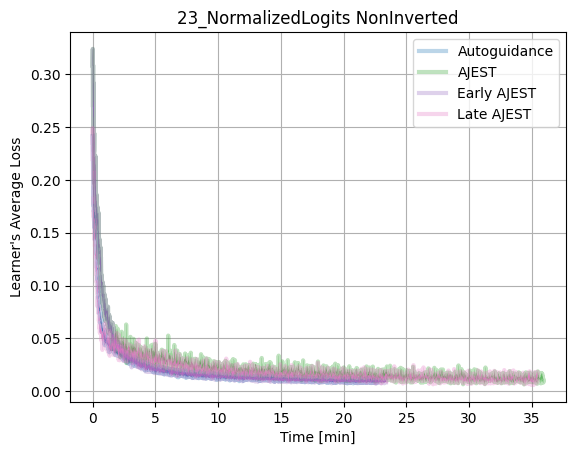

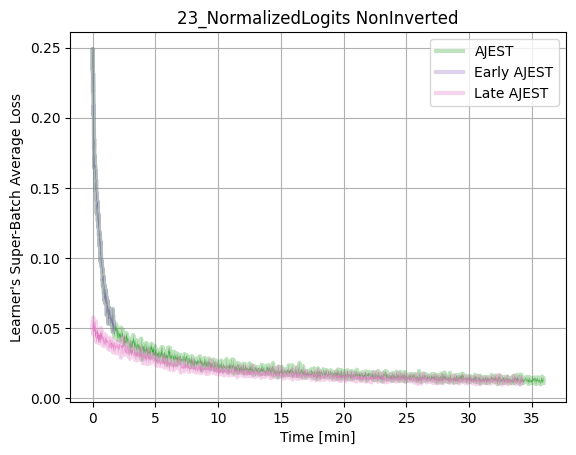

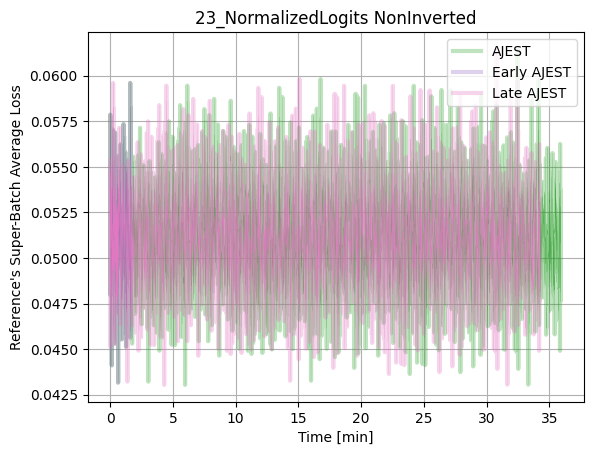

In [264]:
keep = lambda f : "Interpol" not in f and ("NonInverted" in f or "NoACID" in f)
title = "NonInverted"
# keep = lambda f : "Interpol" not in f
# title = "NonInverted"
# max_iter = 750
max_iter = None
# plot_time = False
plot_time = True

for s in series:
    plot_folders = [f for f in series_folders[s] if keep(f)]
    plot_single_key(s, plot_folders, title=title, val=False, plot_time=plot_time, max_iter=max_iter)

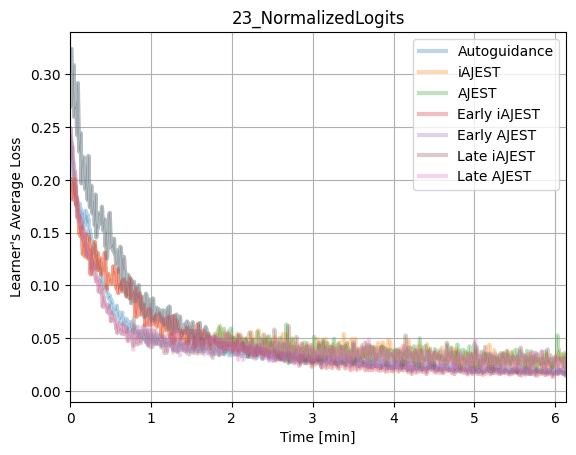

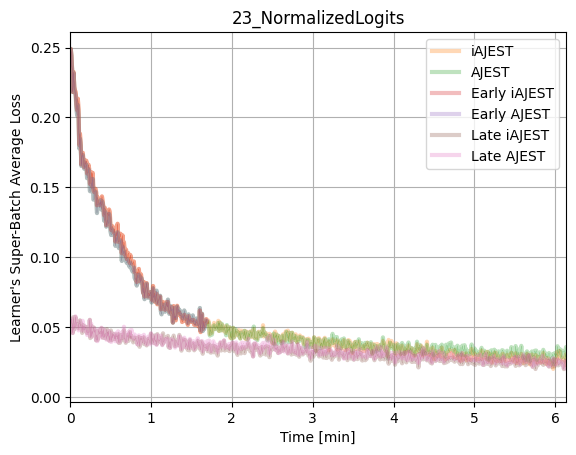

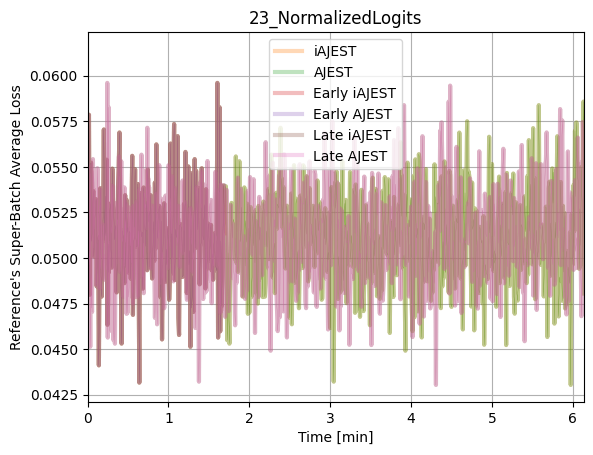

In [265]:
# keep = lambda f : "Interpol" not in f and ("NonInverted" in f or "NoACID" in f)
# title = "NonInverted"
keep = lambda f : "Interpol" not in f
title = None#"NonInverted"
max_iter = 750
# max_iter = None
# plot_time = False
plot_time = True

for s in series:
    plot_folders = [f for f in series_folders[s] if keep(f)]
    plot_single_key(s, plot_folders, title=title, val=False, plot_time=plot_time, max_iter=max_iter)

In [ ]:
# keep = lambda f : "Interpol" not in f and ("NonInverted" in f or "NoACID" in f)
# title = "NonInverted"
keep = lambda f : "Interpol" not in f
title = None#"NonInverted"
max_iter = 750
# max_iter = None
# plot_time = False
plot_time = True

for s in series:
    plot_folders = [f for f in series_folders[s] if keep(f)]
    plot_single_key(s, plot_folders, title=title, val=False, plot_time=plot_time, max_iter=max_iter)

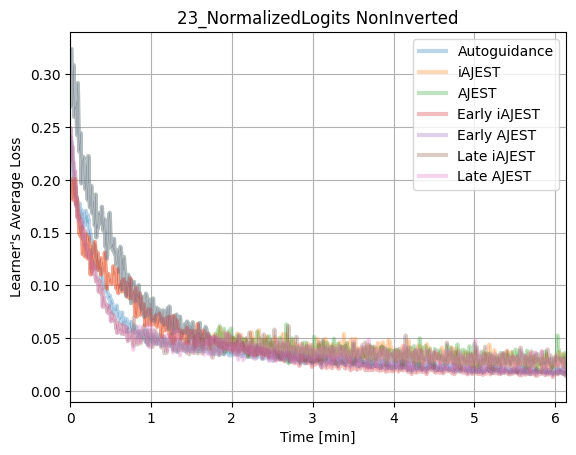

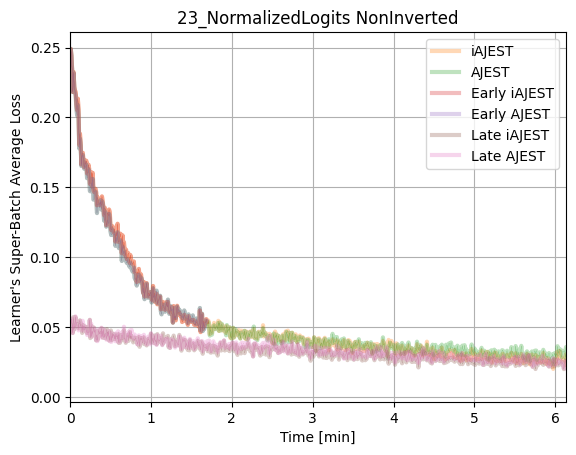

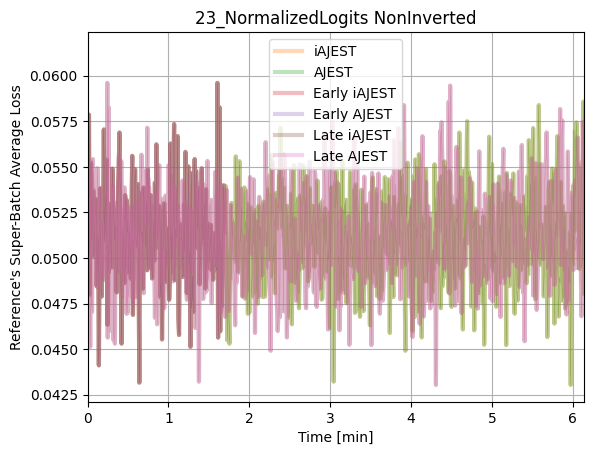

In [262]:
# keep = lambda f : "Interpol" not in f and ("NonInverted" in f or "NoACID" in f)
# title = "NonInverted"
keep = lambda f : "Interpol" not in f
title = "NonInverted"
max_iter = 750
# max_iter = None
# plot_time = False
plot_time = True

for s in series:
    plot_folders = [f for f in series_folders[s] if keep(f)]
    plot_single_key(s, plot_folders, title=title, val=False, plot_time=plot_time, max_iter=max_iter)

#### Validation loss

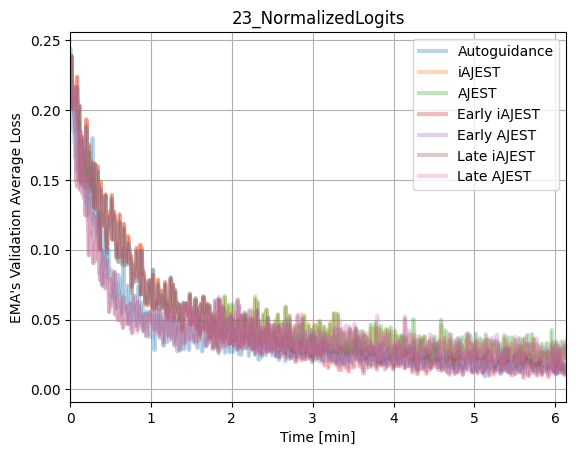

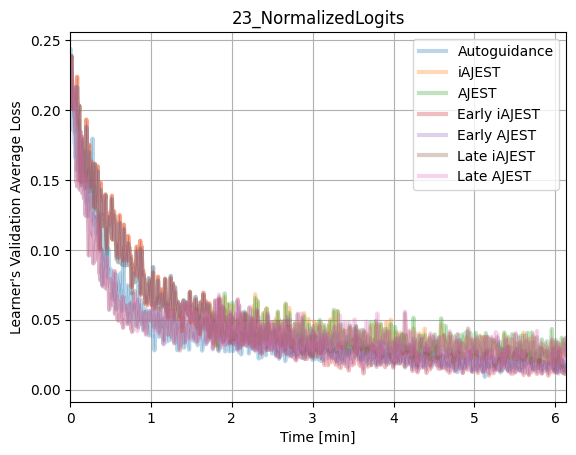

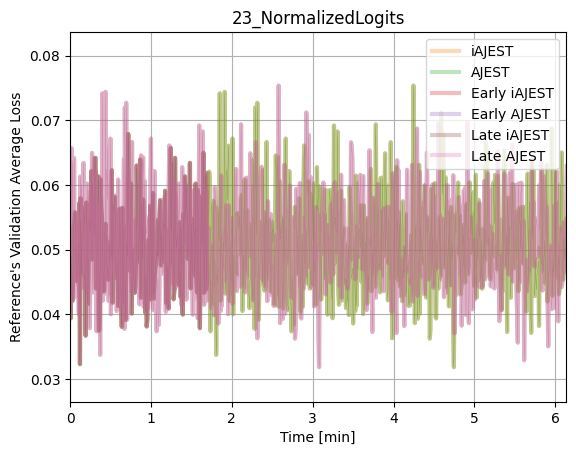

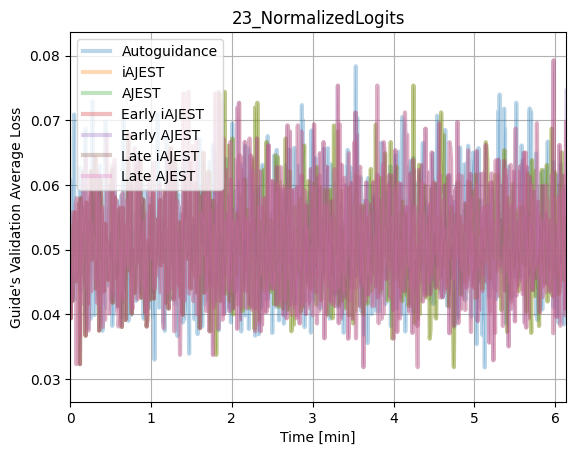

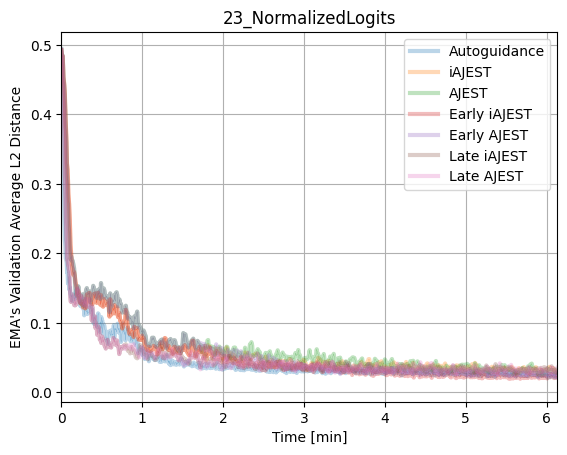

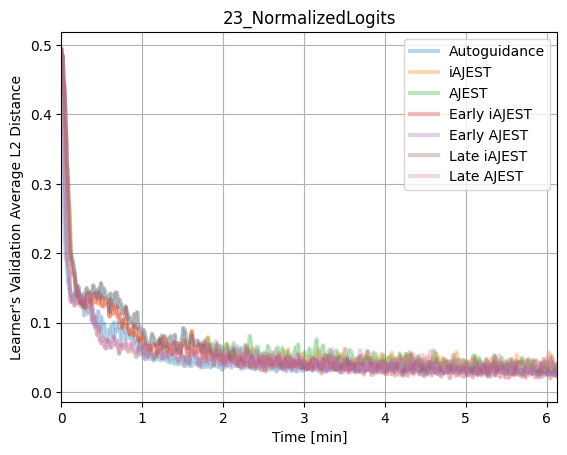

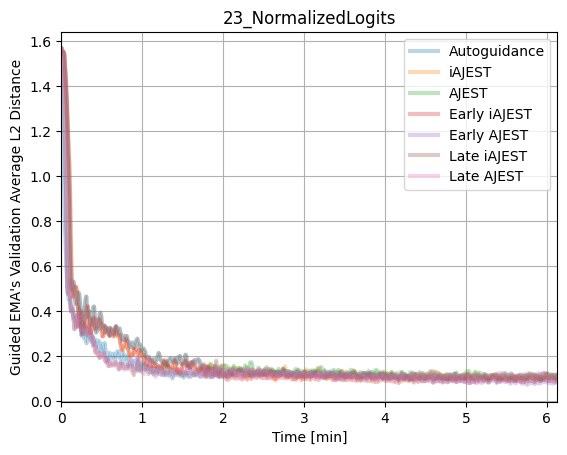

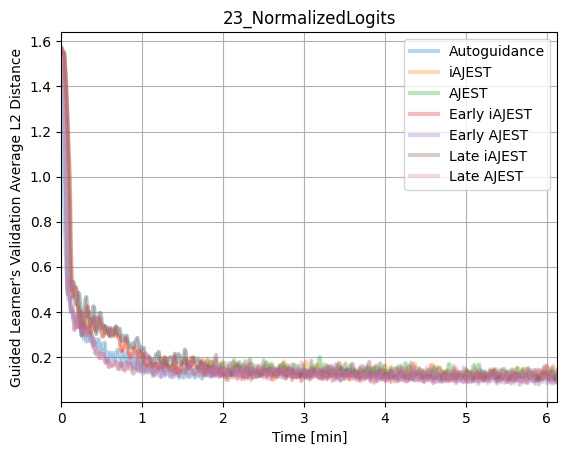

In [260]:
# keep = lambda f : "Interpol" not in f and "NonInverted" in f
# title = "NonInverted"
keep = lambda f : "Interpol" not in f
title = None
max_iter = 750
# max_iter = None
# plot_time = False
plot_time = True

for s in series:
    plot_folders = [f for f in series_folders[s] if keep(f)]
    plot_single_key(s, plot_folders, title=title, val=True, plot_time=plot_time, max_iter=max_iter)

#### Others

<Figure size 640x480 with 0 Axes>

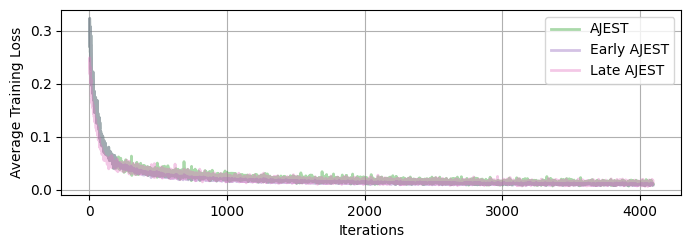

TypeError: cannot unpack non-iterable NoneType object

In [357]:
keep = lambda f : "Interpol" not in f and "NonInverted" in f
title = "NonInverted"
max_iter = 350

for s in series:
    plot_folders = [f for f in series_folders[s] if keep(f)]
    fig, axes = configure_plot(s, plot_folders, title=title, plot_time=False, max_iter=None, nrows=1)
    fig, _ = plot_training_loss(series[0], plot_folders, show_super=False,
                                title=title, plot_time=False, max_iter=None, ax=axes[0])

<Figure size 640x480 with 0 Axes>

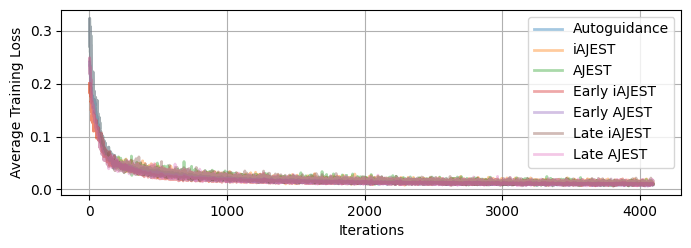

TypeError: cannot unpack non-iterable NoneType object

In [354]:
keep = lambda f : "Interpol" not in f#and "NonInverted" in f
title = "NonInverted"
max_iter = 350

for s in series:
    plot_folders = [f for f in series_folders[s] if keep(f)]
    fig, axes = configure_plot(s, plot_folders, title=title, plot_time=False, max_iter=None, nrows=1)
    fig, _ = plot_training_loss(series[0], plot_folders, show_super=False,
                                title=title, plot_time=False, max_iter=None, ax=axes[0])

In [ ]:
def plot_validation_loss(s, folders, title=None, plot_time=False, max_iter=None, show_ref=False, 
                        fig=None, ax=None):

    # Configuration
    if ax is None:
        fig, ax = configure_plot(s, folders, title=None, plot_time=False, max_iter=None, nrows=1)
    x_values = get_x_values(s, folders, plot_time)

    plotted_ref = False
    for f in folders:
        if show_ref and len(val_results[s][f]["ref_val_loss"])>0 and not plotted_ref:
            ax.plot(x_values[f], val_results[s][f]["ref_val_loss"], "k", 
                    label="Reference's Loss", alpha=1, linewidth=0.5)
            plotted_ref = True
        ax.plot(x_values[f], val_results[s][f]["learner_val_loss"], colors_series[s][f], 
                label=label_series[s][f]+" Loss", alpha=0.4, linewidth=3)
    ax.set_ylabel("Average Validation Loss")
    ax.legend()
    plt.show()

    return fig, ax

<Figure size 640x480 with 0 Axes>

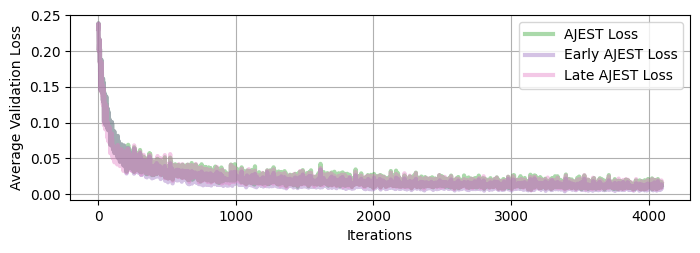

In [345]:
keep = lambda f : "Interpol" not in f and "NonInverted" in f
title = "NonInverted"
max_iter = 350

for s in series:
    plot_folders = [f for f in series_folders[s] if keep(f)]
    fig, axes = configure_plot(s, plot_folders, title=title, plot_time=False, max_iter=None, nrows=1)
    plot_validation_loss(series[0], plot_folders, show_ref=False,
                         title=title, plot_time=False, max_iter=None, fig=fig, ax=axes[0])

# for s in series:
#     plot_folders = [f for f in series_folders[s] if keep(f)]
#     fig, axes = configure_plot(s, plot_folders, title=title, plot_time=False, max_iter=None, nrows=2)
#     plot_training_loss(series[0], plot_folders, show_super=False,
#                        title=title, plot_time=False, max_iter=None, ax=axes[0])
#     plot_validation_loss(series[0], plot_folders, show_ref=False,
#                          title=title, plot_time=False, max_iter=None, fig=fig, ax=axes[1])

In [ ]:
# # First, plot validation loss values
# fig_0, axes_0 = plot_training_loss()
# if len(learner_val_loss)>0:
#     if len(ref_val_loss)>0:
#         axes_0[1].plot(ref_val_loss, "C3", label="ACID Ref Val Loss", alpha=1, linewidth=0.5)
#     axes_0[1].plot(learner_val_loss_2, "k", label="No ACID Learner Val Loss", alpha=0.35, linewidth=2)
#     axes_0[1].plot(learner_val_loss, "k", label="ACID Learner Val Loss", alpha=1.0, linewidth=0.5)
# axes_0[1].set_ylabel("Average Validation Loss")
# axes_0[1].legend()
# plt.tight_layout()
# if zoom_in:
#     for ax in axes_0: ax.set_xlim([0,max_iter])


def plot_validation_loss(s, folders, title=None, plot_time=False, max_iter=None, show_super=False, nrows=4):

    # Configuration
    if title is not None:
        add_title = " " + title
    else:
        add_title = ""
    if plot_time:
        x_values = {f: time_results[s][f]/60 for f in folders}
    else:
        x_values = {f: np.arange(1,total_iters+1) for f in folders}
    if not isinstance(folders, list):
        folders = list(folders)
    n_folders = len(folders)

    plt.suptitle(s + add_title)
    fig, axes = plt.subplots(nrows=nrows, gridspec_kw=dict(hspace=0), figsize=(8, 2.4*nrows))
    if not isinstance(axes, list): axes = [axes]
    for f in folders:
        if show_super: label=label_series[s][f]+" Training Loss"
        else: label=label_series[s][f]
        axes[0].plot(x_values[f], loss_results[s][f]["learner_loss"], color=colors_series[s][f], 
                     label=label, alpha=0.4, linewidth=2)
    if show_super and len(loss_results["super_ref_loss"])>0: 
        axes[0].plot(x_values[f], loss_results[s][f]["super_ref_loss"], color=colors_series[s][f], 
                     label=label_series[s][f]+" JEST$_{R}$ Loss", alpha=1, linewidth=1, linestyle=":")
        axes[0].plot(x_values[f], loss_results[s][f]["super_learner_loss"], color=colors_series[s][f], 
                     label=label_series[s][f]+" JEST$$_{L}$ Loss", alpha=1, linewidth=0.5)
    axes[0].set_ylabel("Average Training Loss")
    axes[0].legend()
    for ax in axes: ax.grid()
    if plot_time:
        axes[-1].set_xlabel("Time [min]")
    else:
        axes[-1].set_xlabel("Iterations")
    for ax in axes[1:]:
        ax.set_xlim(axes[0].get_xlim())
    if max_iter is not None:
        for ax in axes:
            if plot_time:
                ax.set_xlim(0, max([x_values[f][max_iter]]))
            else:
                ax.set_xlim(0, max_iter)
    plt.show()

    return fig, axes

<Figure size 640x480 with 0 Axes>

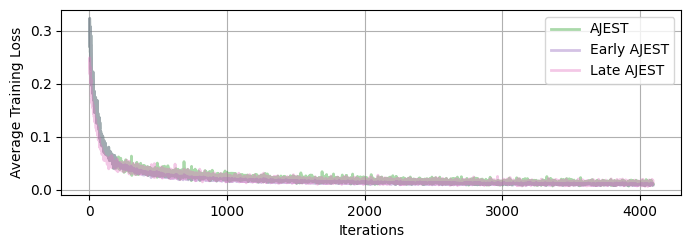

array([8. , 2.4])

In [ ]:
zoom_in = False
max_iter = 350

keep = lambda f : "Interpol" not in f and "NonInverted" in f
add_title = " NonInverted"

fig, axes = plot_training_loss(series[0], [f for f in series_folders[s] if keep(f)], nrows=2)

# # First, plot validation loss values
# fig_0, axes_0 = plot_training_loss()
# if len(learner_val_loss)>0:
#     if len(ref_val_loss)>0:
#         axes_0[1].plot(ref_val_loss, "C3", label="ACID Ref Val Loss", alpha=1, linewidth=0.5)
#     axes_0[1].plot(learner_val_loss_2, "k", label="No ACID Learner Val Loss", alpha=0.35, linewidth=2)
#     axes_0[1].plot(learner_val_loss, "k", label="ACID Learner Val Loss", alpha=1.0, linewidth=0.5)
# axes_0[1].set_ylabel("Average Validation Loss")
# axes_0[1].legend()
# plt.tight_layout()
# if zoom_in:
#     for ax in axes_0: ax.set_xlim([0,max_iter])

# # Also plot EMA validation loss values
# fig_1, axes_1 = plot_training_loss()
# if len(learner_val_loss)>0:
#     if len(ref_val_loss)>0:
#         axes_1[1].plot(ref_val_loss, "C3", label="ACID Ref Val Loss", alpha=1, linewidth=0.5)
#     axes_1[1].plot(ema_val_loss_2, color="m", label="No ACID EMA Val Loss", alpha=0.35, linewidth=2)
#     axes_1[1].plot(ema_val_loss, color="m", label="ACID EMA Val Loss", alpha=0.8, linewidth=0.5)
# axes_1[1].set_ylabel("Average Validation Loss")
# axes_1[1].legend()
# plt.tight_layout()
# if zoom_in:
#     for ax in axes_1: ax.set_xlim([0,max_iter])